### Laboratorio 2 – Proyecto de Predicción de Predicción de Bicicletas

En esta sección ud. estará a cargo de evaluar como se puede realizar la predicción de bicicletas de un local de alquiler.  Como científico de datos tiene la labor de predecir la siguiente demanda del local por medio de un modelo de machine learning utilizando scikit-learn.

### Copiando el Dataset al Computador

Primero debemos adquirir el dataset.  Nuestro dataset a descargar está en la siguiente dirección:
- https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

### Cargar y explorar el dataset

Ahora cargue el dataset y explore las diferentes variables del dataset:
- hour.csv

Cargar el dataset con pandas

In [ ]:
#Instalando librerias - Descomentar para ejecutar

'''
!pip install xgboost
!pip install sklearn
!pip install matplotlib
'''

In [1]:
import numpy as np
import pandas as pd

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


In [2]:
bikeshare = pd.read_csv('hour.csv')

Explorar las primeras 48 filas

In [3]:
bikeshare.head(48)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Desplegar información del dataset

Despliegue información escencial del dataset

-Descripción del dataset : count de valores, media, desviación standar, valor min/max, percentiles 25,50,75

In [4]:
bikeshare.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


-Tipo de datos por cada columna en el dataset para evaluar si tenemos que hacer alguna transformación

In [5]:
bikeshare.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
bikeshare.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [7]:
bikeshare.hr.value_counts()

16    730
17    730
15    729
13    729
14    729
22    728
18    728
19    728
20    728
21    728
23    728
12    728
7     727
8     727
9     727
10    727
11    727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64

In [8]:
bikeshare.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [9]:
bikeshare.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

### Visualizando el dataset

In [10]:
columnas = bikeshare.columns

In [11]:
columnas

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

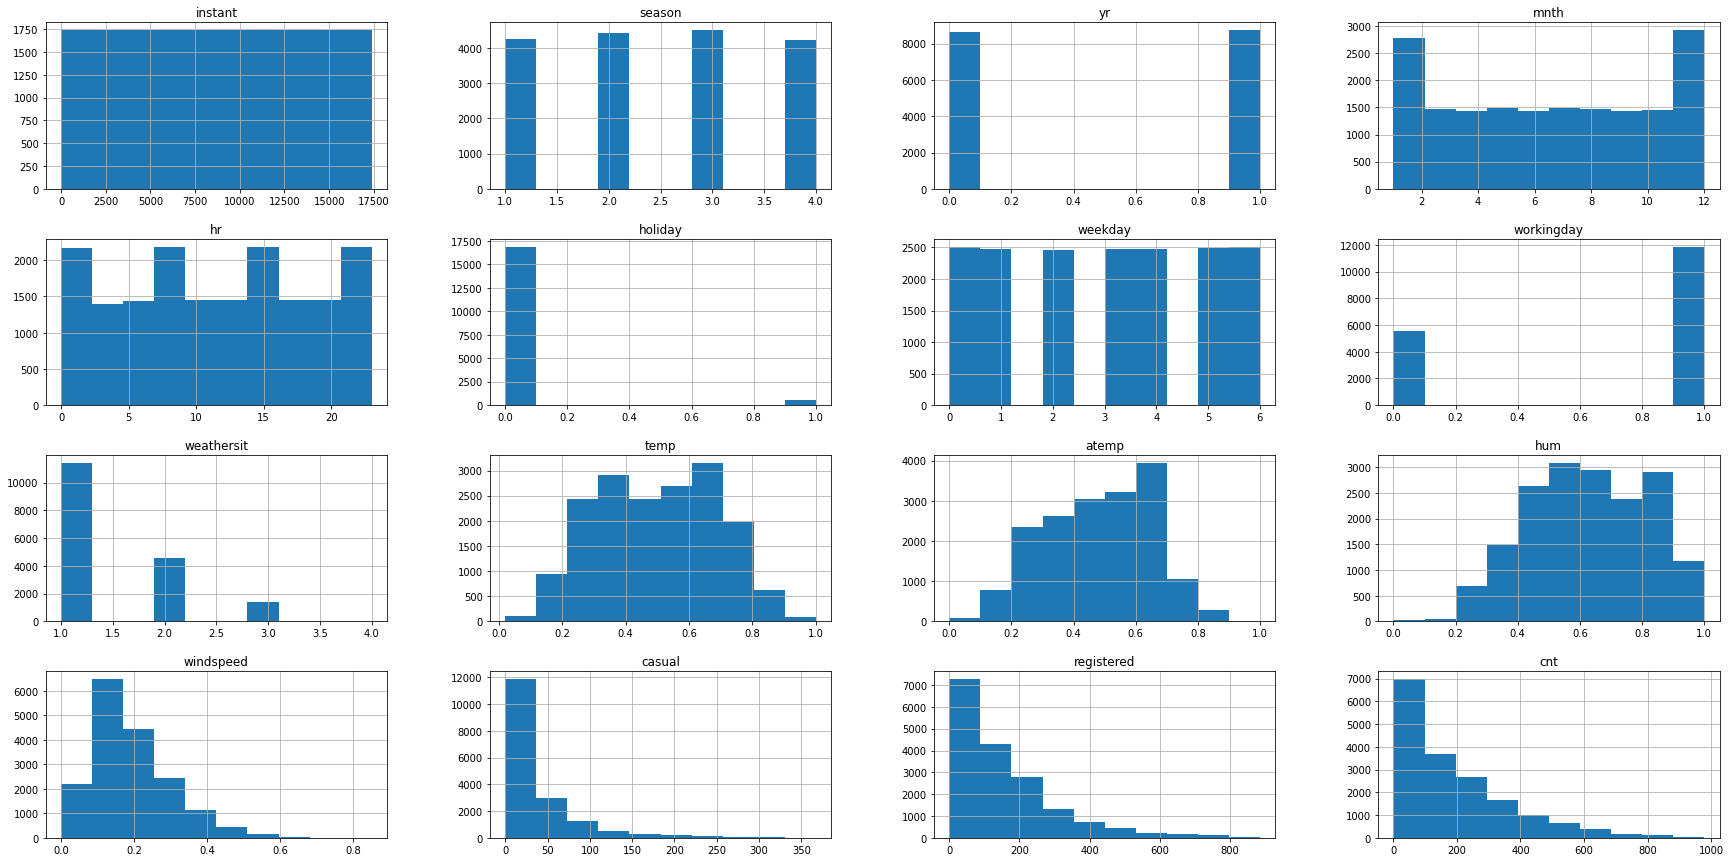

In [12]:
%matplotlib inline
from matplotlib import pyplot


# SU CODIGO AQUI
bikeshare.hist(figsize=(30,15));

### Variables Dummy - Transformación de Data Categórica

Los datos categóricos como temporada, mes, y año deben ser transformados a números debido a que los modelos solo trabajan con esto.  También tendremos variables binarias.  La acción la realizaremos com pandas y la función:
 - get_dummies()
 - columnas dummy = 'season', 'weathersit', 'mnth', 'hr', 'weekday'
 - columnas a borrar = 'instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr'

In [13]:
dummy_cols = [ 'season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_cols:
    dummies = pd.get_dummies(bikeshare[each], prefix=each, drop_first=False)
    bikeshare = pd.concat([bikeshare, dummies], axis=1)

drop_cols = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = bikeshare.drop(drop_cols, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
data.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

### Escalar el Dataset
- variables a escalar = 'casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed'

In [15]:
to_scale = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in to_scale:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std
    

In [33]:
data

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,-0.662736,-0.930162,-0.956312,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,-0.561326,-0.804632,-0.823998,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,-0.622172,-0.837666,-0.868103,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.334609,0.636351,-1.553844,-0.662736,-0.949983,-0.972851,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.334609,0.636351,-1.553844,-0.723582,-1.009445,-1.039008,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,-1.230743,-0.141133,-0.211685,-0.500481,-0.302509,-0.388467,1,0,...,0,0,0,0,1,0,0,0,0,0
17375,1,0,-1.230743,-0.141133,-0.211685,-0.561326,-0.480894,-0.553859,1,0,...,0,0,0,0,1,0,0,0,0,0
17376,1,0,-1.230743,-0.141133,-0.211685,-0.581608,-0.467681,-0.548346,1,0,...,1,0,0,0,1,0,0,0,0,0
17377,1,0,-1.230743,-0.348463,-0.456086,-0.459917,-0.698922,-0.708224,1,0,...,0,1,0,0,1,0,0,0,0,0


In [16]:
data.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

### Separación del Dataset
Separar el dataset en Training y Test
- 20% test set
- Campos de Test = 'cnt', 'casual', 'registered'
- Campos de Train = todos los demas

In [17]:
# Separate the data into features and targets
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.20, random_state=42)

X_train = train.drop(['cnt', 'casual', 'registered'], axis=1)
X_test = test.drop(['cnt', 'casual', 'registered'], axis=1)
y_train = train['cnt']
y_test = test['cnt']


### Entrenamiento

Entrenar el modelo basado en el regresor XGBRegressor

In [18]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 

xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1) 
print(xgbr)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=1, max_delta_step=0, max_depth=3, min_child_weight=1,
             missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=1,
             nthread=None, num_parallel_tree=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=1)


In [19]:
xgbr.fit(X_train, y_train)

[15:41:01] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=1, max_delta_step=0, max_depth=3, min_child_weight=1,
             missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=1,
             nthread=1, num_parallel_tree=1, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=0, silent=None, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=1)

In [20]:
score = xgbr.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.9260026934447557


#### Mean Cross Validation

In [21]:
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

[15:41:02] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:04] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:06] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:07] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:09] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:11] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:12] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:14] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of re

#### K-Fol Cross Validation

In [22]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[15:41:19] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:21] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:22] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:24] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:26] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:27] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:29] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[15:41:31] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of re

### Guardar el Modelo 

Una parte importante es que luego de entrenar podríamos guardar el modelo.  Este paso se realiza luego de haber evaluado varios y validar que cumple con las métricas.  A manera de prueba lo realizaremos antes, sin embargo recordar que es parte de los últimos pasos.

In [23]:
# Guardar el modelo
import pickle

# Guardando el modelo en disco
filename = 'modelo_final.sav'
pickle.dump(xgbr, open(filename, 'wb'))

### Cargar el Modelo

Cuando poseemos la aplicación final, por ejemplo una aplicación por celular o una aplicación web, podemos 'consumir' el modelo llamandolo para realizar nuestras predicciones.  Para esto el modelo debe estar disponible desde una ubicación conocida en la máquina o dispositivo a ejecutar.

In [24]:
# Cargar el modelo
loaded_model = pickle.load(open(filename, 'rb'))

[15:41:36] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [25]:
result = loaded_model.score(X_test, y_test)
print(result)

0.9044876700152815


### Realizar predicciones

Realizar las predicciones con el modelo de los datos de test

In [26]:
# SU CODIGO AQUI
y_pred = loaded_model.predict(X_test)

In [34]:
X_test

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
12830,1,0,1.573634,-1.851600,0.031898,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8688,1,1,-1.334609,-1.125947,0.276298,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7091,0,0,-0.919146,0.169861,0.764282,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
12230,1,0,1.469768,-0.555792,1.374057,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
431,0,0,-1.230743,-0.348463,1.618457,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6759,0,0,0.327244,1.621165,-0.211685,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
13989,1,0,0.742707,0.791848,0.031898,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
173,0,0,-1.542341,-0.192966,1.374057,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16192,1,1,-0.088219,0.740016,-0.211685,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [27]:
#predicciones
y_pred

array([ 1.588541  , -0.20553744, -0.9794471 , ..., -0.875841  ,
        0.25300997,  0.18256497], dtype=float32)

### Evaluar el modelo por medio de métricas

Evaluar el modelo por medio de las métricas de error medio cuadrado

In [28]:
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse*(1/2.0)))

MSE: 0.09
RMSE: 0.05


### Graficar los resultados

Graficar los resultados de la predicción vs los resultados de las pruebas

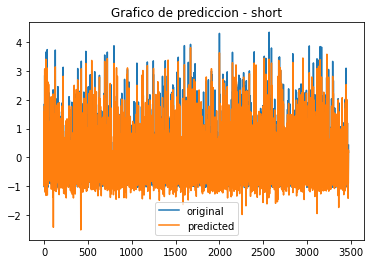

In [29]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Grafico de prediccion - short")
plt.legend()
plt.show()

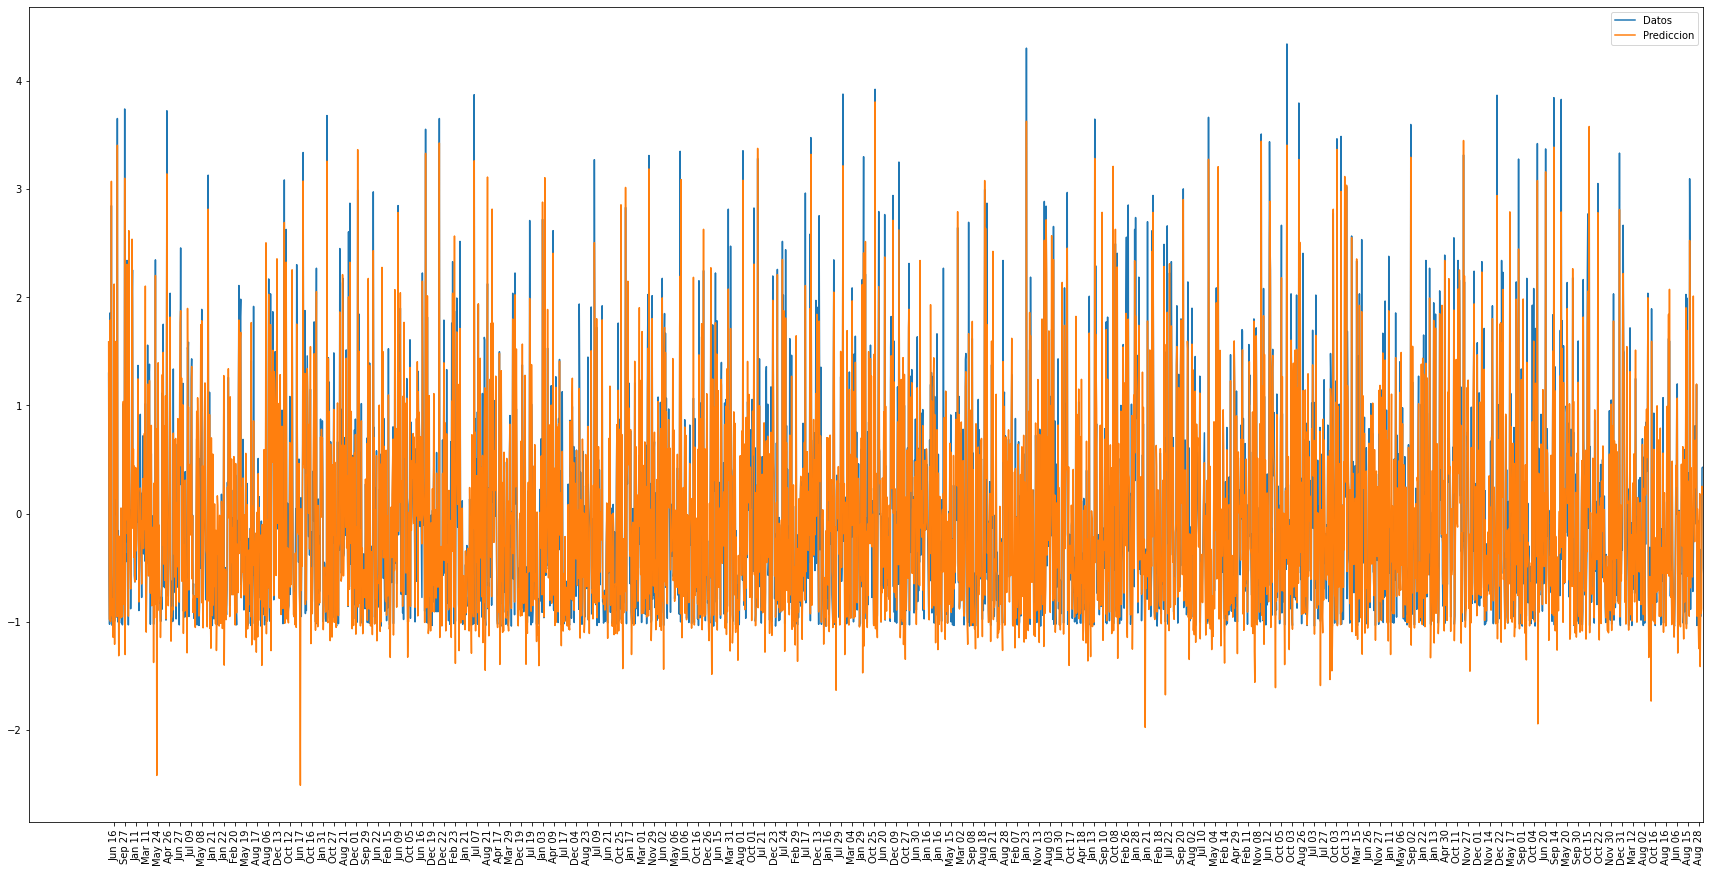

In [30]:
fig, ax = plt.subplots(figsize=(30,15))

ax.plot(y_test.values, label='Datos')
ax.plot(y_pred[:], label='Prediccion')
ax.set_xlim(right=len(y_pred))
ax.legend()

dates = pd.to_datetime(bikeshare.loc[y_test.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=90)

In [31]:
df_test_final = X_test.copy()
df_test_final['cnt_scaled'] = y_test
df_test_final['cnt_scaled_predicted'] = y_pred

In [32]:
df_test_final.head(10)
#Dataframe con la predicción  como columna final

,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,cnt_scaled,cnt_scaled_predicted
12830,1,0,1.573634,-1.851600,0.031898,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1.298528,1.588541
8688,1,1,-1.334609,-1.125947,0.276298,1,0,0,0,1,...,0,0,1,0,0,0,0,0,-0.559372,-0.205537
7091,0,0,-0.919146,0.169861,0.764282,0,0,0,1,1,...,0,0,0,0,0,0,1,0,-1.022468,-0.979447
12230,1,0,1.469768,-0.555792,1.374057,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1.855347,1.787900
431,0,0,-1.230743,-0.348463,1.618457,1,0,0,0,1,...,0,0,0,0,0,1,0,0,-0.972851,-0.998202
1086,0,0,-0.295951,0.480854,0.764282,1,0,0,0,1,...,0,0,0,0,0,0,1,0,-0.868103,-0.942407
11605,1,0,1.158171,-0.244798,-0.456086,0,1,0,0,1,...,0,0,0,0,0,1,0,0,2.847697,3.072140
7983,0,0,-1.230743,1.258339,-1.553844,0,0,0,1,1,...,0,1,0,0,0,0,0,0,-0.901181,-0.937978
10391,1,0,0.015647,0.273525,0.031898,1,0,0,0,1,...,0,0,0,0,1,0,0,0,-1.033495,-0.786331
7046,0,0,-0.399817,0.429022,0.276298,0,0,0,1,1,...,0,0,0,0,1,0,0,0,-0.928746,-0.850092
